# Lab 1

### 1. Escreva um circuito quântico que gere o estado $\frac{i}{\sqrt{3}}|0\rangle + \sqrt{\frac{2i}{3}}|1\rangle$ utilizando o operador $U_3$ descrito [aqui](https://qiskit.org/textbook/ch-states/single-qubit-gates.html#generalU3).

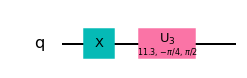

In [1]:
import numpy as np
from qiskit import execute, Aer, ClassicalRegister, QuantumRegister, QuantumCircuit
from inicializa_estado_Bell import inicializa_estado_Bell

q1 = QuantumRegister(1, name='q')
circuito1 = QuantumCircuit(q1)

circuito1.x(0)
circuito1.u3(2*(2*np.pi - np.arccos(np.sqrt(2/3))), -np.pi/4, np.pi/2, 0)

# theta  = 2*(2pi * np.arccos(np.sqrt(2/3)))
# phi    = -np.pi / 4
# lambda = np.pi / 2

circuito1.draw('mpl')


In [2]:
backend = Aer.get_backend('statevector_simulator')
job = execute(circuito1, backend)
result = job.result()
print('Estado gerado pelo circuito: ', result.get_statevector())

np.allclose(result.get_statevector(), [1j/np.sqrt(3), np.sqrt(2*1j/3)])
    


Estado gerado pelo circuito:  [3.53525080e-17+0.57735027j 5.77350269e-01+0.57735027j]


True

### 2. Escreva um circuito que produza o estado $\frac{|000\rangle+|111\rangle}{\sqrt{2}}$

In [3]:
q2 = QuantumRegister(3, name='q')
circuito2 = QuantumCircuit(q2)

circuito2.h(0)
circuito2.cx(0, 1)
circuito2.cx(0, 2)

In [4]:
backend = Aer.get_backend('statevector_simulator')
job = execute(circuito2, backend)
result = job.result()
print('Estado gerado pelo circuito: ', result.get_statevector())

np.allclose(result.get_statevector(), [1/np.sqrt(2), 0, 0, 0, 0, 0, 0, 1/np.sqrt(2)])

Estado gerado pelo circuito:  [0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


True

### 3. Problema de Deutsch
Escreva um circuito $U_f$ para as funções f1, f2, f3 e f4 descritas na aula sobre o problema de Deutsch. Execute o algoritmo de Deutsch para cada uma das funções e verifique sua resposta.

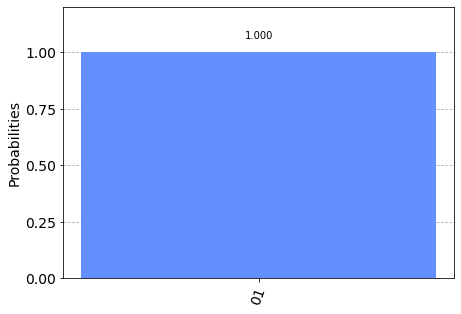

In [26]:
circuit = QuantumCircuit(2, 2)

# ------
# Uf (barreiras pra separar, descomentar a função que quer usar)
# f(0) = 1 e f(1) = 0
circuit.x(0)
circuit.cnot(0, 1)
circuit.x(0)
#-------

circuit.measure(0, 0)
circuit.measure(1, 1)

simulator = Aer.get_backend('qasm_simulator')

result = execute(circuit, backend=simulator).result()
print(result) 

from qiskit.tools.visualization import plot_histogram

circuit.draw('mpl')

plot_histogram(result.get_counts())

### 4. Base de Bell
A base de Bell é formada pelos estados 
$|\beta_{00}\rangle =\frac{|00\rangle+|11\rangle}{\sqrt{2}}$, 
$|\beta_{01}\rangle =\frac{|01\rangle+|10\rangle}{\sqrt{2}}$, 
$|\beta_{10}\rangle =\frac{|00\rangle-|11\rangle}{\sqrt{2}}$, 
$|\beta_{11}\rangle =\frac{|01\rangle-|10\rangle}{\sqrt{2}}$. 
Construa um circuito para identificar um estado da base de Bell com apenas uma medição. O resultado da medição do circuito com entrada $|\beta_{xy}\rangle$ deverá ser o string binário $xy$.

In [144]:
q3 = QuantumRegister(2, 'q')
c3 = ClassicalRegister(2, 'c')                            
circuito3 = QuantumCircuit(q3, c3)

# aqui estamos escolhendo o estado de Bell, 0 -> 00, 1->01, 2->10, 3->11. Você não deve utilizar 
# esta informação em sua solução.
estado = 0
circuito3.append(inicializa_estado_Bell(estado), q3)


#--------------------
#Seu código aqui

circuito3.cx(0, 1)
circuito3.h(0)

#--------------------


circuito3.measure(q3, c3)


In [145]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circuito3, backend)
result = job.result()
# print('Estado gerado pelo circuito: ', result.get_statevector())

print(result.get_counts())

if result.get_counts()["{0:0{fill}b}".format(estado, fill=2)] == 1024:
    print('resposta correta para o estado ', estado)
else:
    print('resposta incorreta para o estado ', estado)

{'00': 1024}
resposta correta para o estado  0


### 5. Decomposição RzRyRz
Determine valores de alpha, beta, gamma e phi de modo que $e^{i alpha} R_z(beta)R_y(gamma)R_z(delta) = H$

In [146]:
from gates import Rz, Ry

alpha = np.pi/2
beta = 0
gamma = np.pi/2
delta = np.pi


print(np.e**(alpha*1j) * Rz(beta) @ Ry(gamma) @ Rz(delta))

[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]]


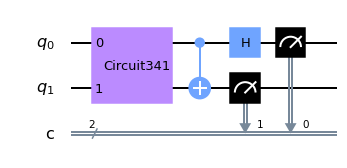

In [147]:
circuito3.draw('mpl')